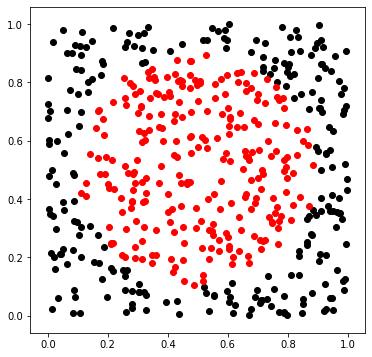

In [2]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
import Modules
import Sequential
import Optimizer
from helpers import generate_disc_set, plot_data, train_model_SGD

torch.set_grad_enabled(False)

data, target, data_test, target_test = generate_disc_set(nb_sample=500, show_data=True)

In [3]:
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,25)
m4 = Modules.Linear(25,2)
relu = Modules.ReLu()
tanh = Modules.Tanh() 
softmax = Modules.Softmax()

nb_epochs = 500
mini_batch_size = 50

# Models
model_tan = Sequential.Sequential(m1, relu, m2, relu, m3, tanh, m4, tanh)
model_softmax = Sequential.Sequential(m1, relu, m2, relu, m3, tanh, m4, softmax)
model_relu = Sequential.Sequential(m1, relu, m2, relu, m3, tanh, m4, tanh)

# Loss criterions
MSE = Modules.MSE()
CROSS = Modules.CrossEntropyLoss()

In [ ]:
#MSE
nb_epochs = 500
best_MSE_tan = [1]
best_MSE_soft = [1]
best_MSE_relu = [1]
best_CROSS_tan = [1]
best_CROSS_soft = [1]
best_CROSS_relu = [1]

for adaptive in [False]:
    for eta in [3e-5,3e-4,3e-3,3e-2]:
        for wd in [3e-7,3e-6,3e-5]:
            print("running")
            best_acc_tanM = []
            best_acc_softmaxM = []
            best_acc_reluM = []
            best_acc_tanCr = []
            best_acc_softmaxCr = []
            best_acc_reluCr = []
        
            for n in range(2):
                #----- MSE
                model_tan.reset_param()
                _, test_accs = train_model_SGD(model_tan,MSE,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_tanM.append(test_accs[-1])
                #---
                model_softmax.reset_param()
                _, test_accs = train_model_SGD(model_softmax,MSE,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_softmaxM.append(test_accs[-1])
                #---
                model_relu.reset_param()                
                _, test_accs_relu = train_model_SGD(model_relu,MSE,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_reluM.append(test_accs[-1])
                #----- CROSS
                model_tan.reset_param()
                _, test_accs = train_model_SGD(model_tan,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_tanCr.append(test_accs[-1])
                #---
                model_softmax.reset_param()
                _, test_accs = train_model_SGD(model_softmax,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_softmaxCr.append(test_accs[-1])
                #---
                model_relu.reset_param()                
                _, test_accs_relu = train_model_SGD(model_relu,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_reluCr.append(test_accs[-1])
        
            
            if np.mean(best_acc_tanM) > best_MSE_tan[-1]:
                best_MSE_tan = [adaptive,eta,wd,np.mean(best_acc_tanM)]
            
            if np.mean(best_acc_softmaxM) > best_MSE_soft[-1]:
                best_MSE_soft = [adaptive,eta,wd,np.mean(best_acc_softmaxM)]
            
            if np.mean(best_acc_reluM) > best_MSE_relu[-1]:
                best_MSE_relu = [adaptive,eta,wd,np.mean(best_acc_reluM)]
            #-------------------------------------------------
            if np.mean(best_acc_tanCr) > best_CROSS_tan[-1]:
                best_CROSS_tan = [adaptive,eta,wd,np.mean(best_acc_tanCr)]
            
            if np.mean(best_acc_softmaxCr) > best_CROSS_soft[-1]:
                best_CROSS_soft = [adaptive,eta,wd,np.mean(best_acc_softmaxCr)]
            
            if np.mean(best_acc_reluCr) > best_CROSS_relu[-1]:
                best_CROSS_relu = [adaptive,eta,wd,np.mean(best_acc_reluCr)]

#CROSS

print("DONE")                           
print("MSE tanh")
print(best_MSE_tan)
print("MSE softmax")
print(best_MSE_soft)
print("MSE relu")
print(best_MSE_relu)

print("Cross tanh")
print(best_CROSS_tan)
print("Cross softmax")
print(best_CROSS_soft)
print("Cross tanh")
print(best_CROSS_relu)


running
running
running
running
running
running


In [ ]:
#MSE

nb_epochs = 200
best_MSE_tan = [1]
best_MSE_soft = [1]
best_MSE_relu = [1]
best_CROSS_tan = [1]
best_CROSS_soft = [1]
best_CROSS_relu = [1]
for adaptive in [0.7,0.8,0.9]:
    print("running")
    for eta in [3e-5,3e-4,3e-3,3e-2]:
        for wd in [3e-7,3e-6,3e-5]:
            print("running")
            best_acc_tanM = []
            best_acc_softmaxM = []
            best_acc_reluM = []
            best_acc_tanCr = []
            best_acc_softmaxCr = []
            best_acc_reluCr = []
        
            for n in range(2):
                #----- MSE
                model_tan.reset_param()
                _, test_accs = train_model_SGD(model_tan,MSE,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_tanM.append(test_accs[-1])
                #---
                model_softmax.reset_param()
                _, test_accs = train_model_SGD(model_softmax,MSE,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_softmaxM.append(test_accs[-1])
                #---
                model_relu.reset_param()                
                _, test_accs_relu = train_model_SGD(model_relu,MSE,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_reluM.append(test_accs[-1])
                #----- CROSS
                model_tan.reset_param()
                _, test_accs = train_model_SGD(model_tan,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_tanCr.append(test_accs[-1])
                #---
                model_softmax.reset_param()
                _, test_accs = train_model_SGD(model_softmax,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_softmaxCr.append(test_accs[-1])
                #---
                model_relu.reset_param()                
                _, test_accs_relu = train_model_SGD(model_relu,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = eta, wd=wd, adaptive = adaptive,
                                plot_loss=False,plot_points=False)
                best_acc_reluCr.append(test_accs[-1])
        
            
            if np.mean(best_acc_tanM) > best_MSE_tan[-1]:
                best_MSE_tan = [adaptive,eta,wd,np.mean(best_acc_tanM)]
            
            if np.mean(best_acc_softmaxM) > best_MSE_soft[-1]:
                best_MSE_soft = [adaptive,eta,wd,np.mean(best_acc_softmaxM)]
            
            if np.mean(best_acc_reluM) > best_MSE_relu[-1]:
                best_MSE_relu = [adaptive,eta,wd,np.mean(best_acc_reluM)]
            #-------------------------------------------------
            if np.mean(best_acc_tanCr) > best_CROSS_tan[-1]:
                best_CROSS_tan = [adaptive,eta,wd,np.mean(best_acc_tanCr)]
            
            if np.mean(best_acc_softmaxCr) > best_CROSS_soft[-1]:
                best_CROSS_soft = [adaptive,eta,wd,np.mean(best_acc_softmaxCr)]
            
            if np.mean(best_acc_reluCr) > best_CROSS_relu[-1]:
                best_CROSS_relu = [adaptive,eta,wd,np.mean(best_acc_reluCr)]

print("done")
print("MSE tanh")
print(best_MSE_tan)
print("MSE softmax")
print(best_MSE_soft)
print("MSE relu")
print(best_MSE_relu)

print("Cross tanh")
print(best_CROSS_tan)
print("Cross softmax")
print(best_CROSS_soft)
print("Cross tanh")
print(best_CROSS_relu)

